In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

### Import df

In [ ]:
df_velos = pd.read_csv("data/accidents-velos.csv", index_col=0)
df_velos.date = pd.to_datetime(df_velos.date)

YEAR = 2021

df_carac = {}
df_lieux = {}
df_usagers = {}
df_vehicules = {}
for YEAR in [2019, 2020, 2021]:
    df_carac[YEAR] = pd.read_csv(f"data/data_accidents/caracteristiques-{YEAR}.csv", index_col=0, sep=";")
    df_lieux[YEAR] = pd.read_csv(f"data/data_accidents/lieux-{YEAR}.csv", index_col=0, sep=";")
    df_usagers[YEAR] = pd.read_csv(f"data/data_accidents/usagers-{YEAR}.csv", index_col=0, sep=";")
    df_vehicules[YEAR] = pd.read_csv(f"data/data_accidents/vehicules-{YEAR}.csv", index_col=0, sep=";")

### Map dataname

In [ ]:
MAPPING_SITUATION = {
    -1: "Non renseigné",
    0: "Aucun",
    1: "Sur chaussée",
    2: "Sur bande d’arrêt d’urgence",
    3: "Sur accotement",
    4: "Sur trottoir",
    5: "Sur piste cyclable",
    6: "Sur autre voie spéciale",
    8: "Autres",
}

MAPPING_VEHICULES = {
    -1: 'Intéderminable',
    0: 'Indéterminable',
    1: 'Bicyclette',
    2: 'Cyclomoteur <50cm3',
    3: 'Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")',
    4: 'Référence inutilisée depuis 2006 (scooter immatriculé)',
    5: 'Référence inutilisée depuis 2006 (motocyclette)',
    6: 'Référence inutilisée depuis 2006 (side-car)',
    7: 'VL seul',
    8: 'Référence inutilisée depuis 2006 (VL + caravane)',
    9: 'Référence inutilisée depuis 2006 (VL + remorque)',
    10: 'VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC',
    11: 'Référence inutilisée depuis 2006 (VU (10) + caravane)',
    12: 'Référence inutilisée depuis 2006 (VU (10) + remorque)',
    13: 'PL seul 3,5T <PTCA <= 7,5T',
    14: 'PL seul > 7,5T',
    15: 'PL > 3,5T + remorque',
    16: 'Tracteur routier seul',
    17: 'Tracteur routier + semi-remorque',
    18: 'Référence inutilisée depuis 2006 (transport en commun)',
    19: 'Référence inutilisée depuis 2006 (tramway)',
    20: 'Engin spécial',
    21: 'Tracteur agricole',
    30: 'Scooter < 50 cm3',
    31: 'Motocyclette > 50 cm3 et <= 125 cm3',
    32: 'Scooter > 50 cm3 et <= 125 cm3',
    33: 'Motocyclette > 125 cm3',
    34: 'Scooter > 125 cm3',
    35: 'Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)',
    36: 'Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)',
    37: 'Autobus',
    38: 'Autocar',
    39: 'Train',
    40: 'Tramway',
    41: '3RM <= 50 cm3',
    42: '3RM > 50 cm3 <= 125 cm3',
    43: '3RM > 125 cm3',
    50: 'EDP à moteur',
    60: 'EDP sans moteur',
    80: 'VAE',
    99: 'Autre véhicule',
}

MAPPING_INTERSECTION = {
    -1: "Indéterminé",
    1: "Hors intersection",
    2: "Intersection en X",
    3: "Intersection en T",
    4: "Intersection en Y",
    5: "Intersection à plus de 4 branches ",
    6: "Giratoire",
    7: "Place",
    8: "Passage à niveau",
    9: "Autre intersection",
}

MAPPING_ATM = {
    -1: "Non renseigné",
    1: "Normale",
    2: "Pluie légère",
    3: "Pluie forte ",
    4: "Neige - grêle",
    5: "Brouillard - fumée ",
    6: "Vent fort tempête ",
    7: "Temps éblouissant ",
    8: "Temps couvert ",
    9: "Autre",
}

MAPPING_COLLISION = {
    -1: "Non renseigné",
    1: "Deux véhicules - frontale",
    2: "Deux véhicules – par l’arrière",
    3: "Deux véhicules – par le coté",
    4: "Trois véhicules et plus – en chaîne",
    5: "Trois véhicules et plus - collisions multiples",
    6: "Autre collision",
    7: "Sans collision",
}

MAPPING_LUM = {
    -1: "Non renseigné",
    1: "Plein jour",
    2: "Crépuscule ou aube",
    3: "Nuit sans éclairage public",
    4: "Nuit avec éclairage public non allumé",
    5: "Nuit avec éclairage public allumé",
}

MAPPING_CATR = {
    1: "Autoroute",
    2: "Route nationale",
    3: "Route Départementale ",
    4: "Voie Communales",
    5: "Hors réseau public",
    6: "Parc de stationnement ouvert à la circulation publique ",
    7: "Routes de métropole urbaine",
    9: "autre",
}

MAPPING_CIRC = {
    -1: "Non renseigné",
    1: "A sens unique",
    2: "Bidirectionnelle",
    3: "A chaussées séparées",
    4: "Avec voies d’affectation variable",
}

MAPPING_VOIE_ADAPTE = {
    -1: "Non renseigné",
    0 : "Sans objet",
    1 : "Piste cyclable ",
    2 : "Bande cyclable ",
    3 : "Voie réservée",
}

MAPPING_PROFIL_ROUTE = {
-1: "Non renseigné",
1 : "Plat",
2 : "Pente",
3 : "Sommet de côte ",
4 : "Bas de côte",
}

MAPPING_PLAN = {
-1: "Non renseigné",
1 : "Partie rectiligne",
2 : "En courbe à gauche ",
3 : "En courbe à droite ",
4 : "En « S »",
}

MAPPING_ETAT_SURFACE = {
    -1: "Non renseigné ",
    1 : "Normale",
    2 : "Mouillée",
    3 : "Flaques ",
    4 : "Inondée ",
    5 : "Enneigée ",
    6 : "Boue",
    7 : "Verglacée",
    8 : "Corps gras – huile ",
    9 : "Autre",
}

MAPPING_AMEMAGEMENT = {
    -1: "Non renseigné",
    0 : "Aucun",
    1 : "Souterrain - tunnel",
    2 : "Pont - autopont",
    3 : "Bretelle d’échangeur ou de raccordement ",
    4 : "Voie ferrée",
    5 : "Carrefour aménagé",
    6 : "Zone piétonne",
    7 : "Zone de péage",
    8 : "Chantier",
    9 : "Autres",
}

MAPPING_USAGER = {
1: "Conducteur",
2: "Passager",
3: "Piéton",
}

MAPPING_GRAV_USAGER = {
-1: "Non renseigné",
1: "Indemne",
2: "Tué",
3: "Blessé hospitalisé ",
4: "Blessé léger",
}
MAPPING_SEXE = {
-1: "Non renseigné",
1: "Masculin",
2: "Féminin",
}

MAPPING_TRAJET = {
-1: "Non renseigné",
0 : "Non renseigné",
1 : "Domicile – travail",
2 : "Domicile – école",
3 : "Courses – achats",
4 : "Utilisation professionnelle ",
5 : "Promenade – loisirs",
9 : "Autre",
}

MAPPING_SECU = {
-1: "Non renseigné",
0 : "Aucun équipement",
1 : "Ceinture",
2 : "Casque",
3 : "Dispositif enfants",
4 : "Gilet réfléchissant",
5 : "Airbag (2RM/3RM)",
6 : "Gants (2RM/3RM)",
7 : "Gants + Airbag (2RM/3RM) ",
8 : "Non déterminable",
9 : "Autre",
}

MAPPING_USAGE_SECU = {
-1: "Non renseigné",
0 : "Non",
}

MAPPING_OBS = {
    -1: "Non renseigné",
    0 : "Sans objet",
    1 : "Véhicule en stationnement",
    2 : "Arbre",
    3 : "Glissière métallique",
    4 : "Glissière béton",
    5 : "Autre glissière",
    6 : "Bâtiment, mur, pile de pont",
    7 : "Support de signalisation verticale ou poste d’appel d’urgence",
    8 : "Poteau",
    9 : "Mobilier urbain",
    10 : "Parapet",
    11 : "Ilot, refuge, borne haute",
    12 : "Bordure de trottoir",
    13 : "Fossé, talus, paroi rocheuse",
    14 : "Autre obstacle fixe sur chaussée",
    15 : "Autre obstacle fixe sur trottoir ou accotement",
    16 : "Sortie de chaussée sans obstacle",
    17 : "Buse – tête d’aqueduc",
}

MAPPING_OBSM = {
    -1: "Non renseigné",
    0 : "Aucun",
    1 : "Piéton",
    2 : "Véhicule",
    4 : "Véhicule sur rail",
    5 : "Animal domestique ",
    6 : "Animal sauvage",
    9 : "Autre",
}

MAPPING_CHOC = {
    -1: "Non renseigné ",
    0 : "Aucun",
    1 : "Avant",
    2 : "Avant droit",
    3 : "Avant gauche",
    4 : "Arrière",
    5 : "Arrière droit",
    6 : "Arrière gauche",
    7 : "Côté droit",
    8 : "Côté gauche",
    9 : "Chocs multiples (tonneaux)",
}

MAPPING_MANOEUVRE = {
-1: "Non renseigné",
0 : "Inconnue",
1 : "Sans changement de direction",
2 : "Même sens, même file",
3 : "Entre 2 files",
4 : "En marche arrière",
5 : "A contresens",
6 : "En franchissant le terre-plein central",
7 : "Dans le couloir bus, dans le même sens",
8 : "Dans le couloir bus, dans le sens inverse",
9 : "En s’insérant",
10: "En faisant demi-tour sur la chaussée",
11: "Changeant de file A gauche",
12: "Changeant de fileA droite",
13: "Déporté A gauche",
14: "Déporté A droite",
15: "Tournant A gauche",
16: "Tournant A droite",
17: "Dépassant A gauche",
18: "Dépassant A droite",
19: "Traversant la chaussée",
20: "Manœuvre de stationnement",
21: "Manœuvre d’évitement",
22: "Ouverture de porte",
23: "Arrêté (hors stationnement)",
24: "En stationnement (avec occupants)" ,
25: "Circulant sur trottoir",
26: "Autres manœuvres",
}

### Aggregate

In [ ]:
YEAR = 2019

CARAC = {
    'date': df_carac[YEAR].apply(lambda x: f"{x.an}-{x.jour}-{x.mois}", axis=1),
    'mois': df_carac[YEAR].mois, 
    'jour': df_carac[YEAR].jour, 
    'heure': df_carac[YEAR].hrmn.str[:2], 
    'departement': df_carac[YEAR].dep, 
    'commune': df_carac[YEAR].com, 
    'lat': df_carac[YEAR].lat.str.replace(",", ".").astype(float), 
    'lon': df_carac[YEAR].long.str.replace(",", ".").astype(float),
    'en agglomeration': df_carac[YEAR]["agg"] == 1, 
    'type intersection': df_carac[YEAR].int.apply(lambda x: MAPPING_INTERSECTION[x]), 
    'type collision': df_carac[YEAR]["col"].apply(lambda x: MAPPING_COLLISION[x]), 
    'luminosite': df_carac[YEAR]["lum"].apply(lambda x: MAPPING_LUM[x]),
    'adresse': df_carac[YEAR]["adr"],
    'conditions atmosperiques': df_carac[YEAR].atm.apply(lambda x: MAPPING_ATM[x]),
}


LIEUX = {
    'type route': df_lieux[YEAR].catr.apply(lambda x: MAPPING_CATR[x]), 
    'n° voie': df_lieux[YEAR].voie,
    'circulation': df_lieux[YEAR].circ.apply(lambda x:MAPPING_CIRC[x]), 
    'nb voies': df_lieux[YEAR].nbv,
    'voie adaptee': df_lieux[YEAR].vosp.apply(lambda x: MAPPING_VOIE_ADAPTE[x]),
    'profil long route': df_lieux[YEAR].prof.apply(lambda x: MAPPING_PROFIL_ROUTE[x]), 
    'trace plan route': df_lieux[YEAR].plan.apply(lambda x: MAPPING_PLAN[x]),
    'largeur TPC': df_lieux[YEAR].lartpc, 
    'largeur route': df_lieux[YEAR].larrout,
    'etat surface': df_lieux[YEAR].surf.apply(lambda x: MAPPING_ETAT_SURFACE[x]), 
    'amenagement': df_lieux[YEAR].infra.apply(lambda x: MAPPING_AMEMAGEMENT[x]), 
    'situation': df_lieux[YEAR].situ.apply(lambda x: MAPPING_SITUATION[x]),
    'vitesse max': df_lieux[YEAR].vma
}


# Mapping usagers
USAGERS = {
    "id": df_usagers[YEAR].id_vehicule,
    "categorie usager": df_usagers[YEAR]["catu"].apply(lambda x: MAPPING_USAGER[x]),
    "gravite accident": df_usagers[YEAR].grav.apply(lambda x: MAPPING_GRAV_USAGER[x]),
    "sexe": df_usagers[YEAR].sexe.apply(lambda x: MAPPING_SEXE[x]),
    "age": df_usagers[YEAR].an_nais - YEAR,
    "motif deplacement": df_usagers[YEAR].trajet.apply(lambda x: MAPPING_TRAJET[x]),
    "existence securite": df_usagers[YEAR].secu1.apply(lambda x: MAPPING_SECU[x]),
    "usage securite": df_usagers[YEAR].secu1.apply(lambda x: MAPPING_USAGE_SECU.get(x, "Oui")),
}

VEHICULE = {
    "id": df_vehicules[YEAR].id_vehicule,
    "categorie vehicule": df_vehicules[YEAR].catv.apply(lambda x: MAPPING_VEHICULES[x]),
    "obstacle fixe heurte": df_vehicules[YEAR].obs.apply(lambda x: MAPPING_OBS[x]),
    "obstacle mobile heurte": df_vehicules[YEAR].obsm.apply(lambda x: MAPPING_OBSM[x]),
    "localisation choc": df_vehicules[YEAR].choc.apply(lambda x: MAPPING_CHOC[x]),
    "manoeuvre avant accident": df_vehicules[YEAR].manv.apply(lambda x: MAPPING_MANOEUVRE[x]),
    "identifiant vehicule": df_vehicules[YEAR].id_vehicule,
    "type autres vehicules": "Indéterminé",
    "manoeuvre autres vehicules": "Indéterminé",
    "nombre autres vehicule": "Indéterminé",
}

df_cara_new = pd.DataFrame(CARAC)
df_lieux_new = pd.DataFrame(LIEUX)
df_usagers_new = pd.DataFrame(USAGERS)
df_vehicules_new = pd.DataFrame(VEHICULE)

In [ ]:
len(df_cara_new), len(df_lieux_new), len(df_usagers_new), len(df_vehicules_new)

In [ ]:
merged_df = pd.concat([df_cara_new, df_lieux_new], axis=1)

In [ ]:
accidents_velos = df_vehicules_new[df_vehicules_new["categorie vehicule"] == "Bicyclette"].index

for idx in accidents_velos:
    vehicles = df_vehicules_new[df_vehicules_new.index == idx]
    
    # Parti vélo
    bike = vehicles[vehicles["categorie vehicule"] == "Bicyclette"]
    
    usager = df_usagers_new[(df_usagers_new.index == idx) & (df_usagers_new["id"] == bike["id"].iloc[0])]
    if len(usager) == 0:
        continue
    for col in usager.columns:
        merged_df.loc[idx, col] = usager[col].iloc[0]
        
    merged_df.loc[idx, "obstacle fixe heurte"] = bike["obstacle fixe heurte"].iloc[0]
    merged_df.loc[idx, "obstacle mobile heurte"] = bike["obstacle mobile heurte"].iloc[0]
    merged_df.loc[idx, "localisation choc"] = bike["localisation choc"].iloc[0]
    merged_df.loc[idx, "manoeuvre avant accident"] = bike["manoeuvre avant accident"].iloc[0]
    merged_df.loc[idx, "identifiant vehicule"] = bike["identifiant vehicule"].iloc[0]
    
    # Other
    merged_df.loc[idx, "type autres vehicules"] = pd.Series.mode(vehicles["categorie vehicule"]).loc[0]
    merged_df.loc[idx, "manoeuvre autres vehicules"] = pd.Series.mode(vehicles["manoeuvre autres vehicules"]).loc[0]
    merged_df.loc[idx, "nombre autres vehicules"] = len(vehicles) - 1

In [ ]:
merged_bikes = merged_df.loc[accidents_velos]

In [ ]:
df_velos_new = merged_bikes[df_velos.columns]

In [ ]:
df_velos_new.to_csv(f"data/df_velos_{YEAR}.csv")

### Concatenate Data

In [ ]:
df_velos_news = pd.concat([pd.read_csv(f"data/df_velos_{year}.csv", index_col=0) for year in [2019, 2020, 2021]])

In [ ]:
df_velos.mois = df_velos.mois.str[:2].astype(int)

In [ ]:
df_velos.jour

In [524]:
import datetime

In [ ]:
dates = df_velos_news.date.apply(lambda x: datetime.datetime.strptime(x, "%Y-%d-%m"))

In [ ]:
jour = dates.dt.weekday

In [ ]:
mapping_jours = {
    0: "lundi",
    1: "mardi", 
    2: "mercredi",
    3: "jeudi", 
    4: "vendredi",
    5: "samedi", 
    6: "dimanche"
}

In [ ]:
df_velos_news.jour = jour.apply(lambda x: f"{x} - {mapping_jours[x]}")

In [ ]:
df_velos_news.date = dates

In [ ]:
pd.concat([df_velos, df_velos_news]).to_csv("data/df_velos_merged.csv")

### Check new df

In [118]:
df_velos_news = pd.read_csv("data/df_velos_merged.csv", index_col=0)
df_velos_news.date = pd.to_datetime(df_velos_news.date)

/var/folders/19/pckvwjyn0r7630jpjn3lh1800000gn/T/ipykernel_13852/1809340773.py:1: DtypeWarning: Columns (15,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_velos_news = pd.read_csv("data/df_velos_merged.csv", index_col=0)


In [132]:
velos_paris = pd.read_csv("data/velos_paris.csv", index_col=0)
velos_paris_large = df_velos_news[df_velos_news.departement.apply(lambda x: intify(x)) == 75]

In [144]:
velos_paris["situation"].value_counts()

Sur chaussée               3220
Sur piste cyclable         1497
Sur autre voie spéciale     208
Sur trottoir                 72
Sur accotement                2
Autres                        2
Name: situation, dtype: int64

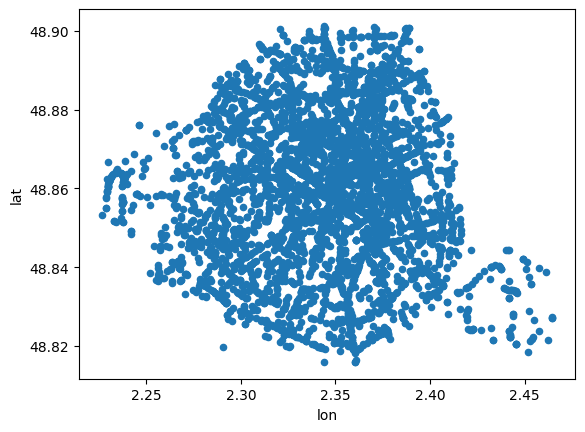

In [177]:
velos_paris_piste = velos_paris[velos_paris.lat > 48.75].plot.scatter("lon", "lat")

In [178]:
velos_paris.situation

201000062968    Sur piste cyclable
201000062968    Sur piste cyclable
201500050797          Sur chaussée
201500052215          Sur chaussée
201500055885          Sur chaussée
                       ...        
202100056069    Sur piste cyclable
202100056184          Sur chaussée
202100056276          Sur chaussée
202100056283          Sur chaussée
202100056424    Sur piste cyclable
Name: situation, Length: 5148, dtype: object

### Get model features for streamlit's form

In [491]:
velos_paris.columns = [string.replace(" ", "_") for string in velos_paris.columns]

In [492]:
velos_paris[["jour", 'luminosite', 'conditions_atmosperiques', 'type_route', 'nb_voies', 'categorie_usager', 'sexe', 'age']]#'piste_cyclable', "arrondissement"]]

,jour,luminosite,conditions_atmosperiques,type_route,nb_voies,categorie_usager,sexe,age
201000062968,6 - dimanche,Plein jour,Normale,Voie Communale,NaN,Conducteur,M,31-32
201000062968,6 - dimanche,Plein jour,Normale,Voie Communale,NaN,Conducteur,M,7-8
201500050797,1 - mardi,Plein jour,Normale,Voie Communale,6.0,Conducteur,M,18-19
201500052215,3 - jeudi,Plein jour,Normale,Voie Communale,NaN,Conducteur,M,25-26
201500055885,5 - samedi,Plein jour,Normale,Voie Communale,1.0,Conducteur,M,24-25
...,...,...,...,...,...,...,...,...
202100056069,2 - mercredi,Crépuscule ou aube,Temps couvert,Voie Communales,2.0,Conducteur,Féminin,-50.0
202100056184,0 - lundi,Nuit avec éclairage public allumé,Normale,Voie Communales,1.0,Conducteur,Masculin,-58.0
202100056276,0 - lundi,Nuit avec éclairage public allumé,Pluie légère,Voie Communales,2.0,Conducteur,Féminin,-51.0
202100056283,0 - lundi,Nuit avec éclairage public allumé,Normale,Voie Communales,4.0,Conducteur,Masculin,-27.0


In [499]:
FEATURES = ["jour", 'luminosite', 'conditions_atmosperiques', 'type_route', 'nb_voies', 'categorie_usager', 'sexe', 'age', 'piste_cyclable', "arrondissement"]

In [502]:
features_to_choices = {}

for feature in FEATURES:
    if feature not in velos_paris.columns:
        print(feature)
        continue
    choices = velos_paris[feature].dropna().unique().tolist()
    features_to_choices[feature] = choices

piste_cyclable
arrondissement


In [ ]:
import json

In [523]:
json.dump(features_to_choices, open("data/model_feature_choices.json", "w"))